### Model Development

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [34]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [35]:
df = pd.read_csv(path, header=0)

In [58]:
df['CPU_frequency'].shape

(238,)

### Single Linear Regression

In [9]:
lm = LinearRegression()

X = df[['CPU_frequency']]
Y= df['Price']

lm.fit(X, Y)

Yhat = lm.predict(X)

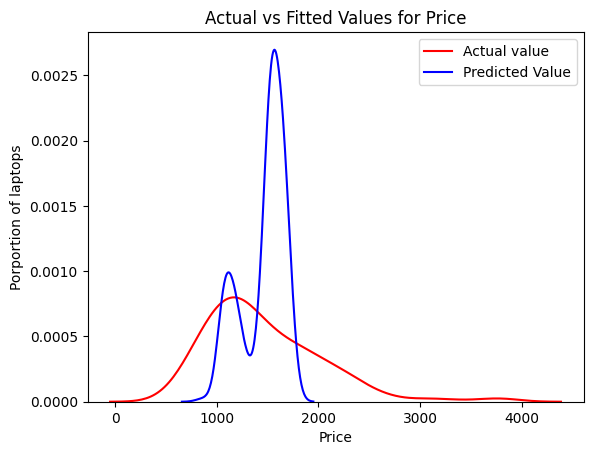

In [11]:
ax1= sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

sns.distplot(Yhat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Porportion of laptops')
plt.legend(['Actual value', 'Predicted Value'])
plt.show()

In [12]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)

print('The R-square for Linear Regression is :', r2_score_slr)
print('The mean square of price and predicted value is:' , mse_slr)

The R-square for Linear Regression is : 0.1344436321024326
The mean square of price and predicted value is: 284583.4405868629


### Multiple Linear Regression

In [41]:
lm = LinearRegression()

X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']] 
Y = df['Price']

In [44]:
lm.fit(X, Y)

LinearRegression()

In [45]:
Y_hat = lm.predict(X)

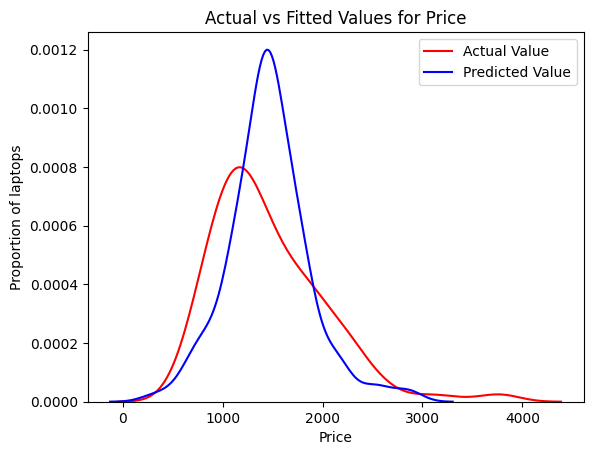

In [46]:
ax2=sns.distplot(df['Price'], hist=False, color="r" , label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="fitted value", ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])

In [47]:
mse_slr1= mean_squared_error(df['Price'], Y_hat)
r2_score_slr1 = lm.score(X, Y)

print('The R-square for Linear Regression is: ', r2_score_slr1)
print('The mean square error of price and predicted value is: ', mse_slr1)

The R-square for Linear Regression is:  0.5082509055187376
The mean square error of price and predicted value is:  161680.57263893104


### Polynomial Regression

In [63]:
X = df['CPU_frequency']
Y= df['Price']


In [64]:

f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [69]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    X_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    Y_new = model(X_new)

    plt.plot(independent_variable, dependent_variabble, '.', X_new, Y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

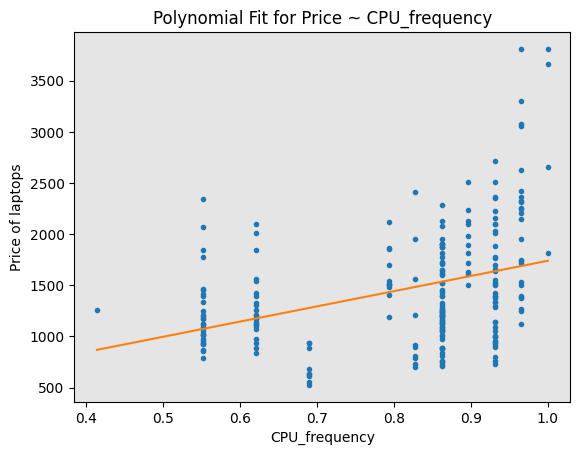

In [70]:
PlotPolly(p1, X, Y, 'CPU_frequency')

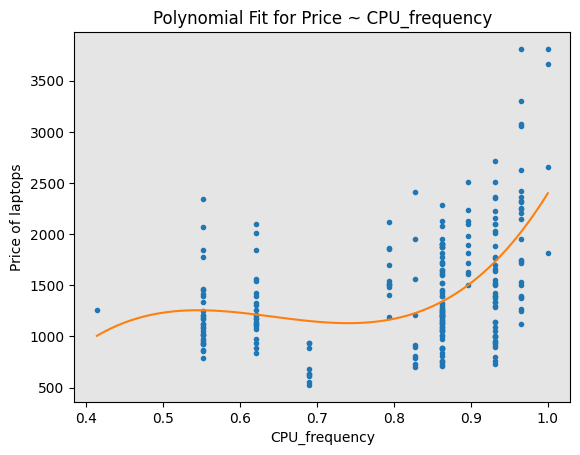

In [71]:
PlotPolly(p3, X, Y, 'CPU_frequency')

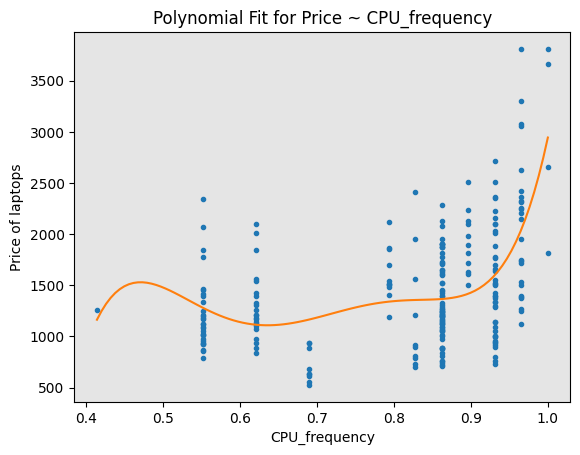

In [72]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [73]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.2669264079653113
The MSE value for 3rd degree polynomial is:  241024.86303848765
The R-square value for 5th degree polynomial is:  0.3030822706443915
The MSE value for 5th degree polynomial is:  229137.29548053455


### Pipeline

In [75]:
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
Y = df['Price']

In [76]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z=Z.astype(float)
pipe.fit(Z, Y)
ypipe=pipe.predict(Z)

In [79]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.80746232362
R^2 for multi-variable polynomial pipeline is:  0.6332096172725036


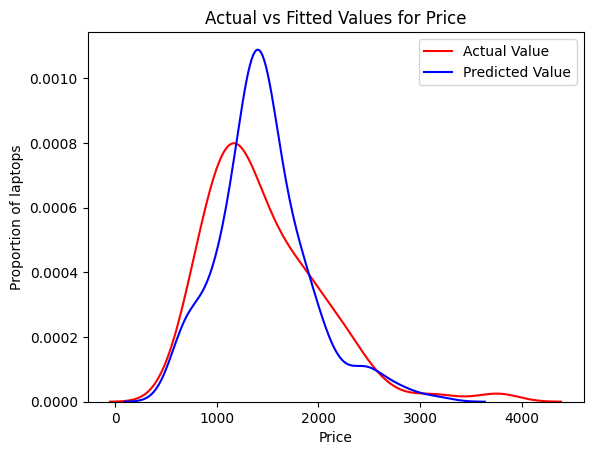

In [80]:
ax3 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(ypipe, hist=False, color="b", label="Fitted Values" , ax=ax3)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])